In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [8]:
df = pd.read_csv('diabetes.csv')

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As minimum values are 0, which is not real case as BP cannot be zero. so needs to be filled by mean values

In [11]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [12]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<Axes: >

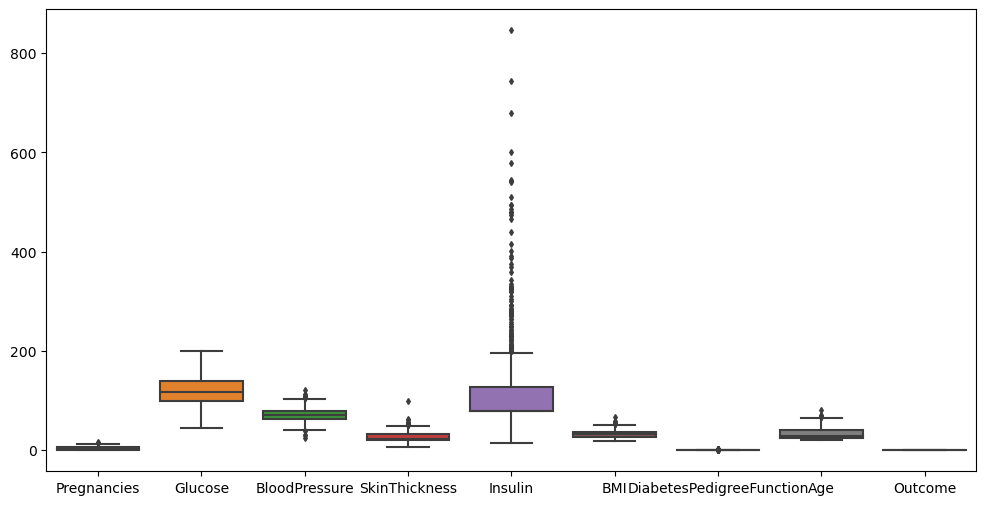

In [15]:
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(df,ax=ax,fliersize=3)

In [16]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33,random_state=43)

As Insulin shows lot of outliers, it can be processed with Standard Scaler to make mean 0, thus removing the outliers.

In [22]:
# making a callable code for StandardScaler
import pickle
def Scaling(Xtrain,Xtest):
    scaler = StandardScaler()
    Xtrain_scaled = scaler.fit_transform(Xtrain)
    Xtest_scaled  = scaler.transform(Xtest)
    
    # Saving this model
    file = open('D:\Python\Diabetes\Models\StandardScalerDiabetes.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return Xtrain_scaled, Xtest_scaled

In [23]:
Xtrain_scaled,Xtest_scaled = Scaling(Xtrain,Xtest)

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
sns.boxplot(Xtrain_scaled,ax=ax,fliersize=3)

In [24]:
# HyperParameter Tuning
# GridSearch CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# parameter grid
parameters = {
    'penalty' : ['l1','l2'],
    'C'       : np.logspace(-3,3,10),
    'solver'  : ['newton-cg','lbfgs','liblinear']
}

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,parameters,scoring='accuracy',cv=10)

In [27]:
clf.fit(Xtrain_scaled,ytrain)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [28]:
clf.best_params_

{'C': 2.154434690031882, 'penalty': 'l2', 'solver': 'liblinear'}

In [30]:
clf.best_score_

0.7643288084464555

In [40]:
C = clf.best_params_["C"]
penalty = clf.best_params_["penalty"]
solver = clf.best_params_["solver"]

In [38]:
C = params["C"]

2.154434690031882

In [41]:
y_pred = clf.predict(Xtest_scaled)

In [42]:
confusion_matrix(ytest,y_pred)

array([[151,  14],
       [ 42,  47]], dtype=int64)

In [43]:
accuracy_score(ytest,y_pred)

0.7795275590551181

In [44]:
logreg = LogisticRegression(penalty=penalty,C=C,solver=solver,random_state=33)

In [46]:
logreg.fit(Xtrain_scaled,ytrain)

LogisticRegression(C=2.154434690031882, random_state=33, solver='liblinear')

In [48]:
y_pred = logreg.predict(Xtest_scaled)

In [49]:
accuracy_score(y_pred,ytest)

0.7795275590551181

In [50]:
import pickle
file = open('D:\Python\Diabetes\Models\LogRegDiabetes.pkl','wb')
pickle.dump(logreg,file)
file.close()